In [1]:
import pandas as pd 
import ast 
from datasets import load_dataset
import matplotlib.pyplot as plt
dataset = load_dataset ('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)


In [2]:
df = df[df['job_title_short'] == 'Data Analyst'].copy()

In [3]:
df_explode = df.explode('job_skills')
skill_stats = df_explode.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
)
skill_stats = skill_stats.sort_values(by='skill_count', ascending = False).head(10)

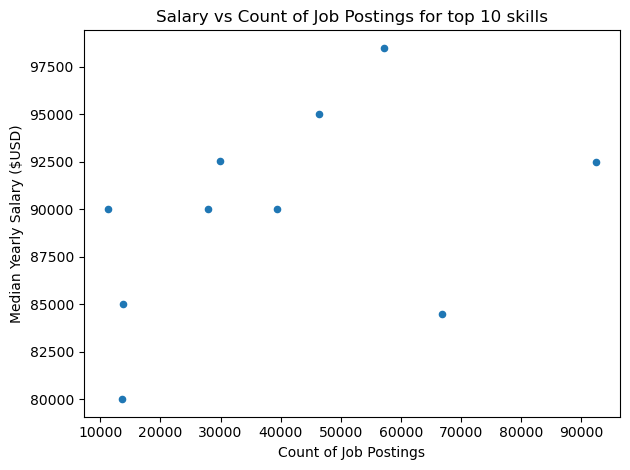

ValueError: Image size of 45844359x36405654 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

In [4]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs Count of Job Postings for top 10 skills')
plt.tight_layout()
plt.show()
for i,txt in enumerate (skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)
